In [ ]:
# LOAD A DATAFRAME

import pandas as pd

df = pd.read_csv('dataset_pca_3_components_personality.csv', sep=';')
df.head()

,PC1,PC2,PC3,Personality
0,0.425156,0.024034,0.255252,0.0
1,-0.822265,-0.213964,0.008904,1.0
2,-0.545634,-0.053308,0.213832,1.0
3,0.908568,-0.042458,0.072104,0.0
4,0.404915,0.079302,0.065595,0.0


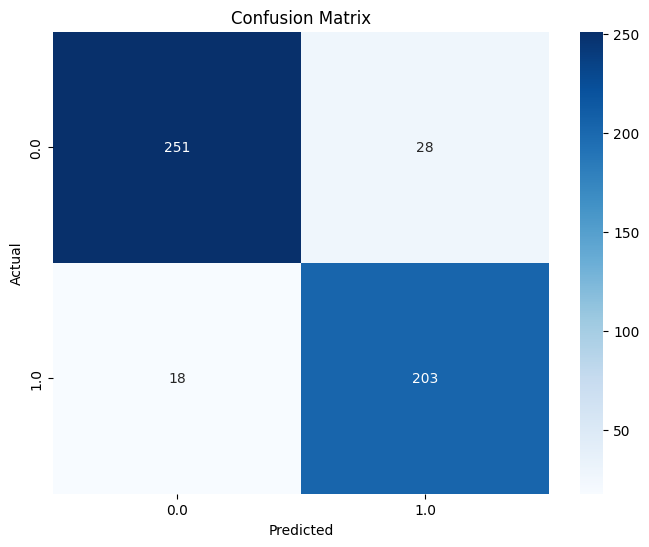

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       279
         1.0       0.88      0.92      0.90       221

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [ ]:
# Apply the Naive Bayes algorithm where the target column is "Personality"
# Generate the confusion matrix with seaborn and the corresponding f1, precision, recall reports

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features (X) and target (y)
X = df.drop('Personality', axis=1)
y = df['Personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


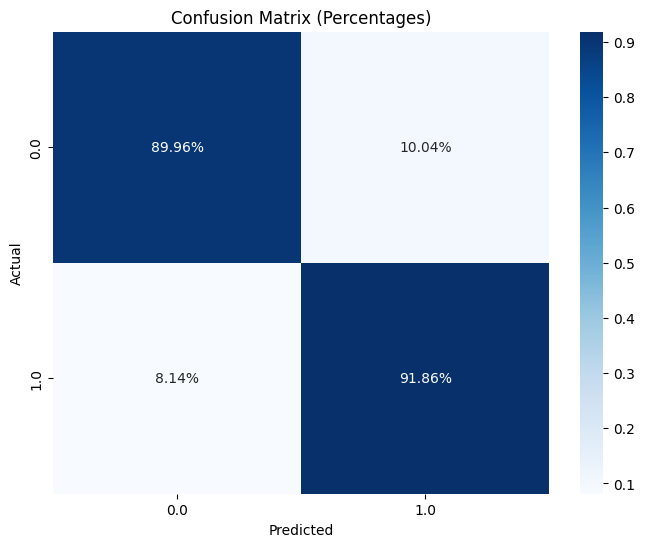

In [ ]:
# crea}te a confusion matriz with percentages

import matplotlib.pyplot as plt
import numpy as np
# Calculate the percentage confusion matrix
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the percentage confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.show()
